## Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from statsmodels.tsa.seasonal import seasonal_decompose 
# from statsmodels.tsa.stattools import adfuller

# import pmdarima as pm
# import statsmodels.api as sm

# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Check first option with all exogenous variables

In [3]:
train_df = pd.read_csv("../output/data_cleaning/lightgbm_lstm/train_lightgbm_lstm.csv").set_index(['year_range', 'country_index'])
test_df = pd.read_csv("../output/data_cleaning/lightgbm_lstm/test_lightgbm_lstm.csv").set_index(['year_range', 'country_index'])

In [4]:
train_df

,,country_t-3,population_t-3,gdp_t-3,temperature_change_from_co2_t-3,cement_co2_t-3,coal_co2_t-3,flaring_co2_t-3,gas_co2_t-3,land_use_change_co2_t-3,oil_co2_t-3,...,gdp_t-1,temperature_change_from_co2_t-1,cement_co2_t-1,coal_co2_t-1,flaring_co2_t-1,gas_co2_t-1,land_use_change_co2_t-1,oil_co2_t-1,co2_including_luc_t+1,co2_including_luc_t+2
year_range,country_index,,,,,,,,,,,,,,,,,,,,,
1931-1932,Argentina,0,0.006986,0.009624,0.027586,0.000315,0.002160,0.000000,0.000253,0.189716,0.001601,...,0.007940,0.026846,0.000402,0.001655,0.000000,0.000386,0.170616,0.001586,0.046617,0.041506
1932-1933,Argentina,0,0.007221,0.010073,0.027586,0.000472,0.002170,0.000000,0.000390,0.190037,0.001654,...,0.007374,0.026846,0.000564,0.001416,0.000000,0.000480,0.157812,0.002007,0.044323,0.040039
1933-1934,Argentina,0,0.007440,0.009648,0.027586,0.000513,0.002117,0.000000,0.000386,0.170616,0.001586,...,0.007125,0.026846,0.000525,0.001291,0.000000,0.000655,0.150694,0.002278,0.042756,0.039101
1934-1935,Argentina,0,0.007643,0.008962,0.027586,0.000719,0.001811,0.000000,0.000480,0.157812,0.002007,...,0.007466,0.026846,0.000540,0.001215,0.000000,0.000880,0.145852,0.002371,0.041755,0.038219
1935-1936,Argentina,0,0.007828,0.008660,0.027586,0.000670,0.001651,0.000000,0.000655,0.150694,0.002278,...,0.008077,0.026846,0.000596,0.001342,0.000000,0.001063,0.142382,0.002428,0.040813,0.037676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-2004,Vietnam,44,0.059400,0.027916,0.027586,0.015277,0.005401,0.017756,0.002607,0.206100,0.009186,...,0.026209,0.026846,0.017601,0.005604,0.013673,0.003490,0.148809,0.011342,0.055115,0.053990
2004-2005,Vietnam,44,0.060031,0.029763,0.027586,0.017845,0.006506,0.017690,0.002183,0.159475,0.010126,...,0.028055,0.026846,0.019924,0.006518,0.016147,0.004431,0.157641,0.011685,0.057655,0.049060
2005-2006,Vietnam,44,0.060668,0.031786,0.027586,0.022460,0.007168,0.013673,0.003490,0.148809,0.011342,...,0.030158,0.026846,0.021913,0.007093,0.015907,0.007456,0.160666,0.013424,0.052390,0.046892


## Find the parameters of the model

In [4]:
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Separate features and targets
X_train = train_df.drop(['co2_including_luc_t+1', 'co2_including_luc_t+2'], axis=1)
y_train = train_df[['co2_including_luc_t+1', 'co2_including_luc_t+2']]

X_test = test_df.drop(['co2_including_luc_t+1', 'co2_including_luc_t+2'], axis=1)
y_test = test_df[['co2_including_luc_t+1', 'co2_including_luc_t+2']]

# Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', learning_rate=0.01, num_leaves=45)

# Use MultiOutputRegressor to handle multiple target variables
multi_output_model = MultiOutputRegressor(lgb_model)

# Train the model on multiple targets
multi_output_model.fit(X_train, y_train)

# Make predictions
y_pred = multi_output_model.predict(X_test)

# Evaluate the model for both targets
rmse1 = mean_squared_error(y_test['co2_including_luc_t+1'], y_pred[:, 0], squared=False)
rmse2 = mean_squared_error(y_test['co2_including_luc_t+2'], y_pred[:, 1], squared=False)

print(f"RMSE for co2_including_luc_t+1: {rmse1}")
print(f"RMSE for co2_including_luc_t+2: {rmse2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6474
[LightGBM] [Info] Number of data points in the train set: 3034, number of used features: 30
[LightGBM] [Info] Start training from score 0.082984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6474
[LightGBM] [Info] Number of data points in the train set: 3034, number of used features: 30
[LightGBM] [Info] Start training from score 0.078669
RMSE for co2_including_luc_t+1: 0.14016895821973813
RMSE for co2_including_luc_t+2: 0.13341603399994956


/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Separate features and targets
X_train = train_df.drop(['co2_including_luc_t+1', 'co2_including_luc_t+2'], axis=1)
y_train = train_df[['co2_including_luc_t+1', 'co2_including_luc_t+2']]

X_test = test_df.drop(['co2_including_luc_t+1', 'co2_including_luc_t+2'], axis=1)
y_test = test_df[['co2_including_luc_t+1', 'co2_including_luc_t+2']]

# Initialize LightGBM Regressor with updated parameters
lgb_model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    learning_rate=0.01,
    num_leaves=45,  # Reduced num_leaves to avoid overly complex splits
    max_depth=5,  # Limit the depth of the trees
    reg_alpha=0.1,  # Regularization to prevent overfitting
    reg_lambda=0.1,
    colsample_bytree=0.7,  # Column sampling to improve model stability
    force_col_wise=True,  # Force column-wise data processing for stability
    verbose=-1  # Suppress logs to clean the output
)

# Use MultiOutputRegressor to handle multiple target variables
multi_output_model = MultiOutputRegressor(lgb_model)

# Train the model on multiple targets
multi_output_model.fit(X_train, y_train)

# Make predictions
y_pred = multi_output_model.predict(X_test)

# Evaluate the model for both targets
rmse1 = mean_squared_error(y_test['co2_including_luc_t+1'], y_pred[:, 0], squared=False)
rmse2 = mean_squared_error(y_test['co2_including_luc_t+2'], y_pred[:, 1], squared=False)

print(f"RMSE for co2_including_luc_t+1: {rmse1}")
print(f"RMSE for co2_including_luc_t+2: {rmse2}")


RMSE for co2_including_luc_t+1: 0.14148080197608143
RMSE for co2_including_luc_t+2: 0.133747407202259


/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
y_pred_df = pd.DataFrame(y_pred, columns=['pred_co2_including_luc_t+1', 'pred_co2_including_luc_t+2'], index=y_test.index)
y_comparison_df = pd.concat([y_test, y_pred_df], axis=1)
y_comparison_df

,,co2_including_luc_t+1,co2_including_luc_t+2,pred_co2_including_luc_t+1,pred_co2_including_luc_t+2
year_range,country_index,,,,
2003-2004,Argentina,0.072679,0.079424,0.062708,0.060706
2004-2005,Argentina,0.084815,0.083970,0.067361,0.066005
2005-2006,Argentina,0.089670,0.086260,0.074593,0.068351
2006-2007,Argentina,0.092114,0.067298,0.078020,0.074422
2007-2008,Argentina,0.071866,0.059847,0.081778,0.077897
...,...,...,...,...,...
2017-2018,Vietnam,0.089198,0.086123,0.067601,0.066483
2018-2019,Vietnam,0.091968,0.096704,0.072561,0.066973
2019-2020,Vietnam,0.103267,0.099593,0.071624,0.067134


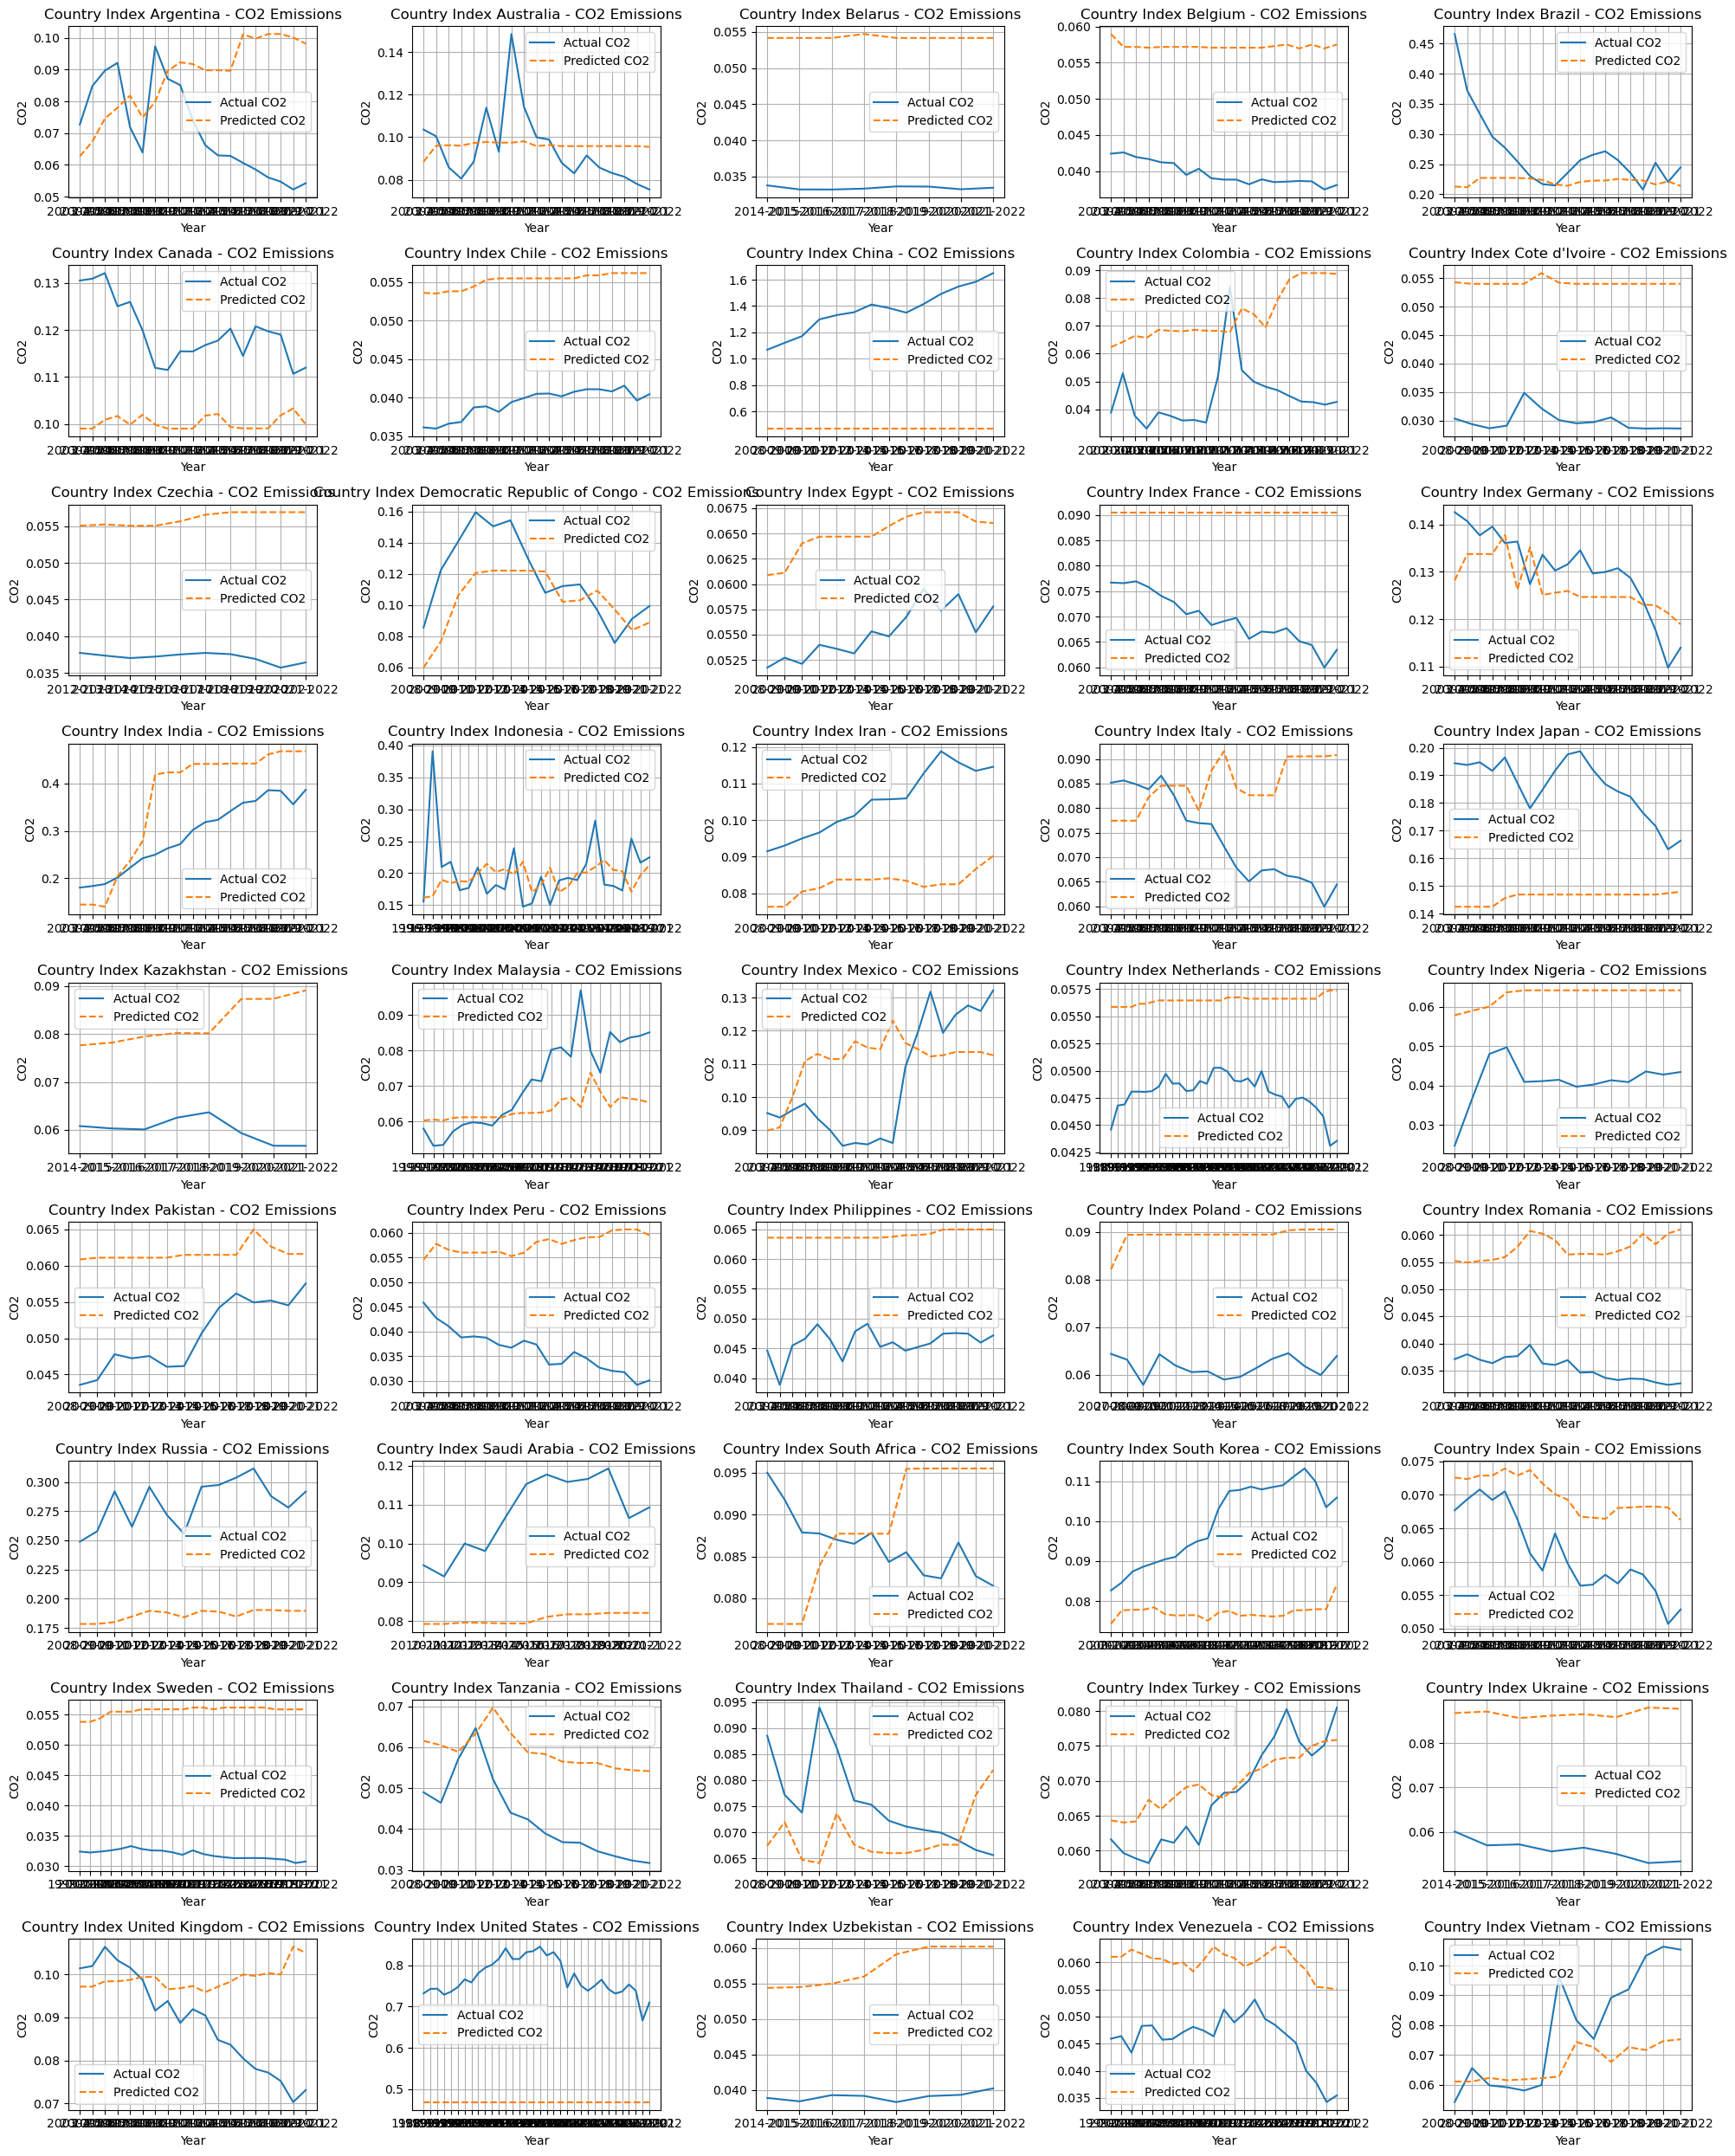

In [11]:
num_rows = 9
num_cols = 5
countries = y_comparison_df.index.get_level_values('country_index').unique()  # Get unique country indexes from the index

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25), squeeze=False)
axes = axes.flatten()

for i, country_index in enumerate(countries):
    # Filter results for the current country index by using .loc on the index
    country_results = y_comparison_df.loc[y_comparison_df.index.get_level_values('country_index') == country_index]
    ax = axes[i]
    
    # Plot the actual and predicted CO2 for each country index
    ax.plot(country_results.index.get_level_values('year_range'), country_results['co2_including_luc_t+1'], label='Actual CO2')
    ax.plot(country_results.index.get_level_values('year_range'), country_results['pred_co2_including_luc_t+1'], label='Predicted CO2', linestyle='--')
    
    ax.set_title(f'Country Index {country_index} - CO2 Emissions')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2')
    ax.grid(True)
    
    ax.legend()

# Delete any remaining unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [1]:
# LGBM
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

X_train = train_df.iloc[:, :-2]
y_train = train_df.iloc[:, -1]

cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = lgb.LGBMRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "num_leaves": [10, 20, 30, 40, 100, 120],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [50, 100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7, 1]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

NameError: name 'train_df' is not defined

In [ ]:
sarimax_models = {}

for country in countries:
    exog_train_country = exog_train_df[exog_train_df['country_index'] == country].drop(columns=['country_index'])
    y_train_country = y_train_df[y_train_df['country_index'] == country]['co2_including_luc']
    
    order = auto_arima_models[country]['order']
    
    model = sm.tsa.SARIMAX(y_train_country, 
                           exog=exog_train_country, 
                           order=order, 
                           enforce_invertibility=False)
    results = model.fit(disp=False)

    sarimax_models[country] = {
        'model': model,
        'results': results,
        'summary': results.summary()
    }

### Prediction - test set

In [ ]:
results_test_list = []

for country in countries:
    exog_test_country = exog_test_df[exog_test_df['country_index'] == country].drop(columns=['country_index'])
    y_test_country = y_test_df[y_test_df['country_index'] == country]['co2_including_luc']
    
    exog_train_country = exog_train_df[exog_train_df['country_index'] == country].drop(columns=['country_index'])
    y_train_country = y_train_df[y_train_df['country_index'] == country]['co2_including_luc']

    results_test = sarimax_models[country]['results']

    y_pred = results_test.predict(
        start=len(y_train_country),
        end=len(y_train_country) + len(exog_test_country) - 1,
        exog=exog_test_country
    )

    df_results = pd.DataFrame({
        'year': exog_test_country.index,
        'country': country,
        'predicted': y_pred.values,
        'actual': y_test_country.values
    })

    results_test_list.append(df_results)

final_results_test_df = pd.concat(results_test_list, ignore_index=True).set_index(['year'])
final_results_test_df

In [ ]:
num_rows = 9
num_cols = 5


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25), squeeze=False)
axes = axes.flatten()

for i, country in enumerate(countries):
    country_results = final_results_test_df[final_results_test_df['country'] == country]
    ax = axes[i]
    
    ax.plot(country_results.index, country_results['actual'], label='Rzeczywiste dane CO2')
    ax.plot(country_results.index, country_results['predicted'], label='Przewidywane CO2', linestyle='--')
    
    ax.set_title(f'{country} - CO2 Emisje')
    ax.set_xlabel('Rok')
    ax.set_ylabel('CO2')
    ax.grid(True)
    
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Predict - train set

In [ ]:
results_train_list = []

for country in countries:
    exog_train_country = exog_train_df[exog_train_df['country_index'] == country].drop(columns=['country_index'])
    y_train_country = y_train_df[y_train_df['country_index'] == country]['co2_including_luc']

    results_train = sarimax_models[country]['results']

    y_pred = results_train.predict(
        start=0,
        end=len(y_train_country) - 1,
        exog=exog_train_country
    )

    df_results = pd.DataFrame({
        'year': exog_train_country.index,
        'country': country,
        'predicted': y_pred.values,
        'actual': y_train_country.values
    })

    results_train_list.append(df_results)

final_results_train_df = pd.concat(results_train_list, ignore_index=True).set_index(['year'])
final_results_train_df


In [ ]:
num_rows = 9
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25), squeeze=False)
axes = axes.flatten()

for i, country in enumerate(countries):
    country_results = final_results_train_df[final_results_train_df['country'] == country]
    ax = axes[i]
    
    ax.plot(country_results.index, country_results['actual'], label='Rzeczywiste dane CO2')
    ax.plot(country_results.index, country_results['predicted'], label='Przewidywane CO2', linestyle='--')
    
    ax.set_title(f'{country} - CO2 Emisje')
    ax.set_xlabel('Rok')
    ax.set_ylabel('CO2')
    ax.grid(True)
    
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Check metrics - test set

In [ ]:
y_true = final_results_test_df['actual']
y_pred = final_results_test_df['predicted']

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

# Print metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')

In [ ]:
metrics_by_country = []


for country in final_results_test_df['country'].unique():
    country_data = final_results_test_df[final_results_test_df['country'] == country]

    y_true = country_data['actual']
    y_pred = country_data['predicted']
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    metrics_by_country.append({
        'Country': country,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE (%)': mape,
        'R²': r2
    })

metrics_df = pd.DataFrame(metrics_by_country)
metrics_df